---
layout: default
title: "Deep Learning - Bias & Variance"
categories: deeplearning
permalink: /ML25/
order: 25
comments: true
---

In [18]:
%pylab --no-import-all inline
import pandas as pd
from plot_ann import ann
from mpl_flow import Flow
from itertools import chain

Populating the interactive namespace from numpy and matplotlib


# Bias and Variance
Bias and Variance in ML (<a href="ML8#biasvariance">check this figure</a>)  are fundamental concepts and expert practitioners usually have a deep understanding of bias/variance related topics. 

In the deep learning era there is less discussion about the bias/variance trade-off because in the deep learning era there is less trade-off. So the concepts of bias and variance are still central but their trade-off is no more so important.

The reason for this is that in the pred-deep learning era usually you could reduce bias at the cost of increasing variance or vice-versa, but generally it wasn't possible to just reduce bias or just reduce variance. Instead, in deep learning, as long as you get a bigger network (in terms of layers or hidden units) you will generally reduce bias without impacting variance (if regularized properly), and as long as you can get more data you will generally reduce variance without impacting bias.

## Identify bias/variance from subset error
When only two features are present we can just look at the model (<a href="ML8#biasvariance">check this figure</a>) and identify situations of high bias (panel A) or high variance (panel C).

When many features are present we can no longer visualize the model but we can employ some metrics that will help us identify these problems.

Suppose you have a classifier that should identify cat pictures. So $y=1$ for a picture of a cat and $y=0$ for any other pictures.

Suppose you fit your model on the training set and then measure the error on both the training set and development set and obtain the error as in <a href="#biasvarerror">the table below</a>.

In [3]:
caption = 'Four cases of error (as percentage of miscalssifications) calculated on the train- and test-sets after fitting a model'
pd.DataFrame([["1%","15%","15%","0.5%"],["11%","16%","30%","1%"]], 
             columns=[f'case {i}' for i in range(1, 5)], 
             index=['train set', 'dev set']).style.set_caption(caption).set_table_attributes('id="biasvarerror"')

,case 1,case 2,case 3,case 4
train set,1%,15%,15%,0.5%
dev set,11%,16%,30%,1%


Assuming that a person would have an error $\approx 0%$ and that the train and dev sets are drawn from the same distribution:

* case 1 is a case of high variance
* case 2 is a case of high bias
* case 3 is a case of high bias AND high variance (the worst scenario)
* case 4 is a case of low bias and low variance (the best scenario)

It is important to notice that we detected bias and variance based on the assumption that the **optimal error**, also called **Bayes error** is $\approx 0%$.

Would the Bayes error $\approx 15%$, then we can say that case 2 is a case of low bias and low variance.

## Basic recipe for correct training
This is a basic recipe to apply when training a model:

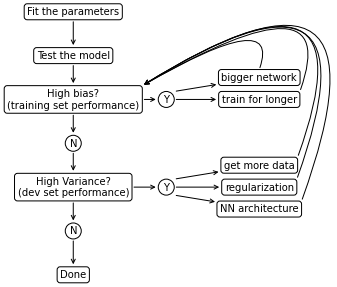

In [4]:
f = Flow(direction='ns', figsize=(4, 5))
f.node('Fit the parameters')
f.node('Test the model')
f.node('a', label='High bias?\n(training set performance)')
f.node('Y', bbox=dict(boxstyle='circle'), travel='e', distance=.5)
f.node('c', 'bigger network', travel='ne', distance=.5)
f.edge('c', 'a', tailport='n', arrowprops=dict(connectionstyle="angle3,angleA=30,angleB=-110"))
f.node('d', label='train for longer', startpoint='Y', travel='e', distance=.5)
f.edge('d', 'a', tailport='ne', headport='ne', arrowprops=dict(connectionstyle="angle3,angleA=30,angleB=-110"))
f.node('N', bbox=dict(boxstyle='circle'), startpoint='a')
f.node('b', label='High Variance?\n(dev set performance)')
f.node('Y', bbox=dict(boxstyle='circle'), travel='e', distance=.5)
f.node('e', label='get more data', travel='ne', distance=.5)
f.edge('e', 'a', tailport='ne', headport='ne', arrowprops=dict(connectionstyle="angle3,angleA=32,angleB=-110"))
f.node('f', label='regularization', travel='e', distance=.5, startpoint='Y')
f.edge('f', 'a', tailport='ne', headport='ne', arrowprops=dict(connectionstyle="angle3,angleA=32,angleB=-110"))
f.node('g', label='NN architecture', travel='se', distance=.5, startpoint='Y')
f.edge('g', 'a', tailport='ne', headport='ne', arrowprops=dict(connectionstyle="angle3,angleA=32,angleB=-110"))
f.node('N', bbox=dict(boxstyle='circle'), startpoint='b')
f.node('Done');

## Regularization
When your model is overfitting your data (high variance) you can either get more data, which may not always be possible, or apply **regularization**.

We already talked about regularization in <a href="ML8">this lesson</a>, where the cost function of logistic regression is regularized and the regularization is mediated by the regularization parameter $\lambda$

$$
\begin{equation}
J(w,b)=\frac{1}{m}\sum_{i=1}^m\mathcal{L}\left(\hat{y}^{(i)},y^{(i)}\right)+\frac{\lambda}{2m}\|w\|_2^2
\end{equation}
\label{eq:l2reg} \tag{1}
$$

where $\|w\|_2^2$ is called the $L_2$ norm of the vector $w$ and consequently $\eqref{eq:l2reg}$ is called $L_2$ regularization.

$$
\|w\|_2^2  =\sum^{n_x}_{j=1}w_j^2=w^Tw
$$

$L_2$ is the most common type of regularization however sometimes $L_1$ regularization is used with

$$
\frac{\lambda}{2m}\|w\|_1 = \frac{\lambda}{2m}\sum_{i=1}^{n_x}|w| 
$$

This will cause $w$ to be sparse (have many zeros) and sometimes this can help compressing the model because the representation of zeros might sometimes require less memory than a non-zero number. However, this has a relatively small effect and usually $L_2$ regularization is preferred in deep-learning problems. 

### Regularized cost function in a neural network
In a neural network out cost function is a function of parameters in all $L$ layers and consequently its regularization sums over all the parameter matrices $w^{[l]}$ of each layer $l$:

$$
\begin{equation}
J(w^{[1]},b^{[1]}, \dots, w^{[L]},b^{[L]})=\frac{1}{m}\sum_{i=1}^m\mathcal{L}\left(\hat{y}^{(i)},y^{(i)}\right) + \underbrace{\frac{\lambda}{2m} \sum_{l=1}^L \|w^{[l]}\|^2}_\text{regularization}
\end{equation}
\label{eq:l2regnn} \tag{2}
$$

where the norm $\| w^{[l]} \|^2$ is

$$
\| w^{[l]} \|^2=\sum_{i=1}^{n^{[l-1]}}\sum_{j=1}^{n^{[l]}}(w^{[l]}_{ij})^2  \qquad w \in R^{n^{[l-1]}\times n^{[l]}}
$$

This norm is called the [Frobenius norm](https://mathworld.wolfram.com/FrobeniusNorm.html#:~:text=The%20Frobenius%20norm%2C%20sometimes%20also,considered%20as%20a%20vector%20norm.) of a matrix and is denoted with $\| w^{[l]} \|_F$

### Regularized backpropagation
When backpropagating error across the neural network (before regularization) you obtain $dw^{[l]}$ at each level $l$ and then update $w^{[l]}$

$$
\begin{aligned}
 dW^{[l]} & = \overbrace{\frac{1}{m} dZ^{[l]} A^{[l-1]T}}^\text{from backpropagation} = dW^{[l]}_{bp} \\ 
 w^{[l]}  :& = w^{[l]}-\alpha \cdot dw^{[l]}
\end{aligned}
\qquad \qquad \qquad dW^{[l]} = \frac{\partial J}{\partial w^{[l]}}
$$



When the regularization term is added to the objective function $\eqref{eq:l2regnn}$ you obtain from backpropagation $dW^{[l]}_{bp}$ with the regularization term added (which still ensures the validity of $dW^{[l]} = \frac{\partial J}{\partial w^{[l]}}$):

$$
\begin{aligned}
dW^{[l]} & = dW^{[l]}_{bp} + \overbrace{\frac{\lambda}{m}w^{[l]}}^\text{regularization} \\
w^{[l]}  : & = w^{[l]}- \alpha \left[ dW^{[l]}_{bp} + \frac{\lambda}{m} w^{[l]} \right] \\
& = w^{[l]}- \frac{\alpha \lambda}{m} w^{[l]} - \alpha \cdot dW^{[l]}_{bp} \\
& = w^{[l]} \underbrace{\left( 1-\frac{\alpha \lambda}{m} \right)}_\text{weight decay regularization} - \underbrace{\alpha \cdot dW^{[l]}_{bp}}_\text{ordinary gradient descent}
\end{aligned}
$$

The term $w^{[l]} \cdot \left( 1-\frac{\alpha \lambda}{m} \right)$ contributes (together with the ordinary gradient descent term) to the update of $w^{[l]}$ by multiplying it by a term which is $< 1$: this is the reason why $L_2$ regularization is sometimes called **weight decay**.

### Why regularization prevents overfitting
Let's see two ways of intuitively explain why regularization prevents (or reduces) overfitting.

#### Canceling hidden units contribution

A first way to imagine the effect of regularization on gradient descent is that of thinking of the *weight* of some hidden units in a network being very small and almost null. This simplify the architecture of the neural network rendering it able to represent simpler functions.

Suppose we have a deep neural network as in <a href="#deepnn">the figure below</a>

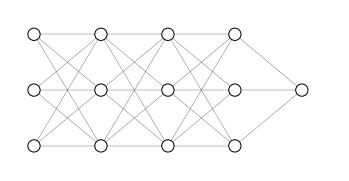

In [14]:
ax, *_ = ann([3, 3, 3, 3, 1], height=.5)
ax.set_aspect('equal')

<i id="deepnn">A 4 layers neural network</i>

When applying regularization we will add the term $\frac{\lambda}{2m} \sum_{l=1}^L \|w^{[l]}\|^2$ to the cost function $J(w^{[l]}, b^{[l]})$. In this way we will increase the cost for high values of $w^{[l]}$ and bring gradient descent to reduce the values $w^{[l]}$.

For a sufficiently high value of the regularization parameter $\lambda$, we will have $w^{[l]} \approx 0$. In turn, this will give $a^{[l]} \approx 0$ for some nodes (<a href="#regdeepnn">figure below</a>), reducing the complexity of the functions encoded by the neural network. 

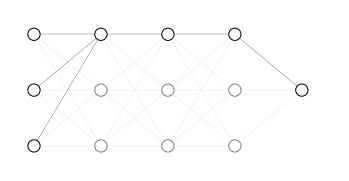

In [42]:
propagate = lambda l, n: list(chain.from_iterable([l]*n))

ax, *_ = ann([3, 3, 3, 3, 1], height=.5, 
             node_colors=['k']*3 +propagate(['k', 'grey', 'grey'], 3), 
             edge_colors=propagate(['k']+['lightgrey']*2, 3) + propagate(['k']+['lightgrey']*8, 3))

ax.set_aspect('equal')

<i id="#regdeepnn">The effect of regularized gradient descent on the values of parameters ($w$) and hidden units ($a$), where lightgrey represents values $\approx 0$</i>

#### Forcing hidden units to linearity
A second way to imagine the effect of regularization on gradient descent is that if thinking that, by reducing the values of the parameters $w$, regularized gradient descent forces the activation values $a$ to be linear.

Suppose you have an hidden unit with activation function $g(z) = \tanh(z)$. Having a sufficiently high regularization parameter $\lambda$ implies that the values of the parameter matrix $w^{[l]}$ will deviate from extreme values and tend to 0. 

When the activation function (tanh in this case) is applied to $z$, since the latter falls in values close to 0, $g(z)$ will be mostly linear (<a hred="#lintanh">figure below</a>). A combination of any number of linear hidden units will result in a linear model.

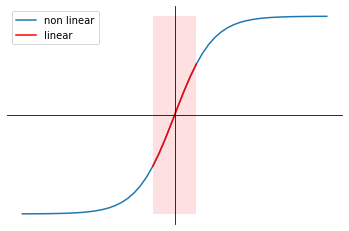

In [122]:
x = np.linspace(-4, 4)
y = np.tanh(x)

ax = plt.gca()
ax.plot(x, y, label='non linear')

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_xticks([])
ax.set_yticks([])
ax.fill_between(x[21:29], np.ones(8), np.ones(8)*-1, alpha=.12, facecolor='r')
ax.plot(x[21:29], y[21:29], c='r', label='linear')
ax.legend();

<i id="lintanh">hyperboloid target function of the range of values (-4, 4) with the central, mostly linear, part highlighted in red</i>